# End to End multi-class Dog breed classification
### the data set being used is:
https://www.kaggle.com/competitions/dog-breed-identification/data

In [4]:
# unzip the data set
# !unzip "drive/MyDrive/dog-breed-images/archive.zip" -d "drive/MyDrive/dog_vision"

# Get the workspace ready

In [5]:
# --import tensorflow into colab--
import tensorflow as tf
import tensorflow_hub as hub

In [6]:
print("tensorflow version:", tf.__version__)
print("tensorflow hub version:", hub.__version__)
print("gpu is", "avalible" if tf.config.list_physical_devices("GPU") else "not avalible")

tensorflow version: 2.18.0
tensorflow hub version: 0.16.1
gpu is avalible


## Getting the data ready (turning into tensor)

In [7]:
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/dog_vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


<Axes: xlabel='breed'>

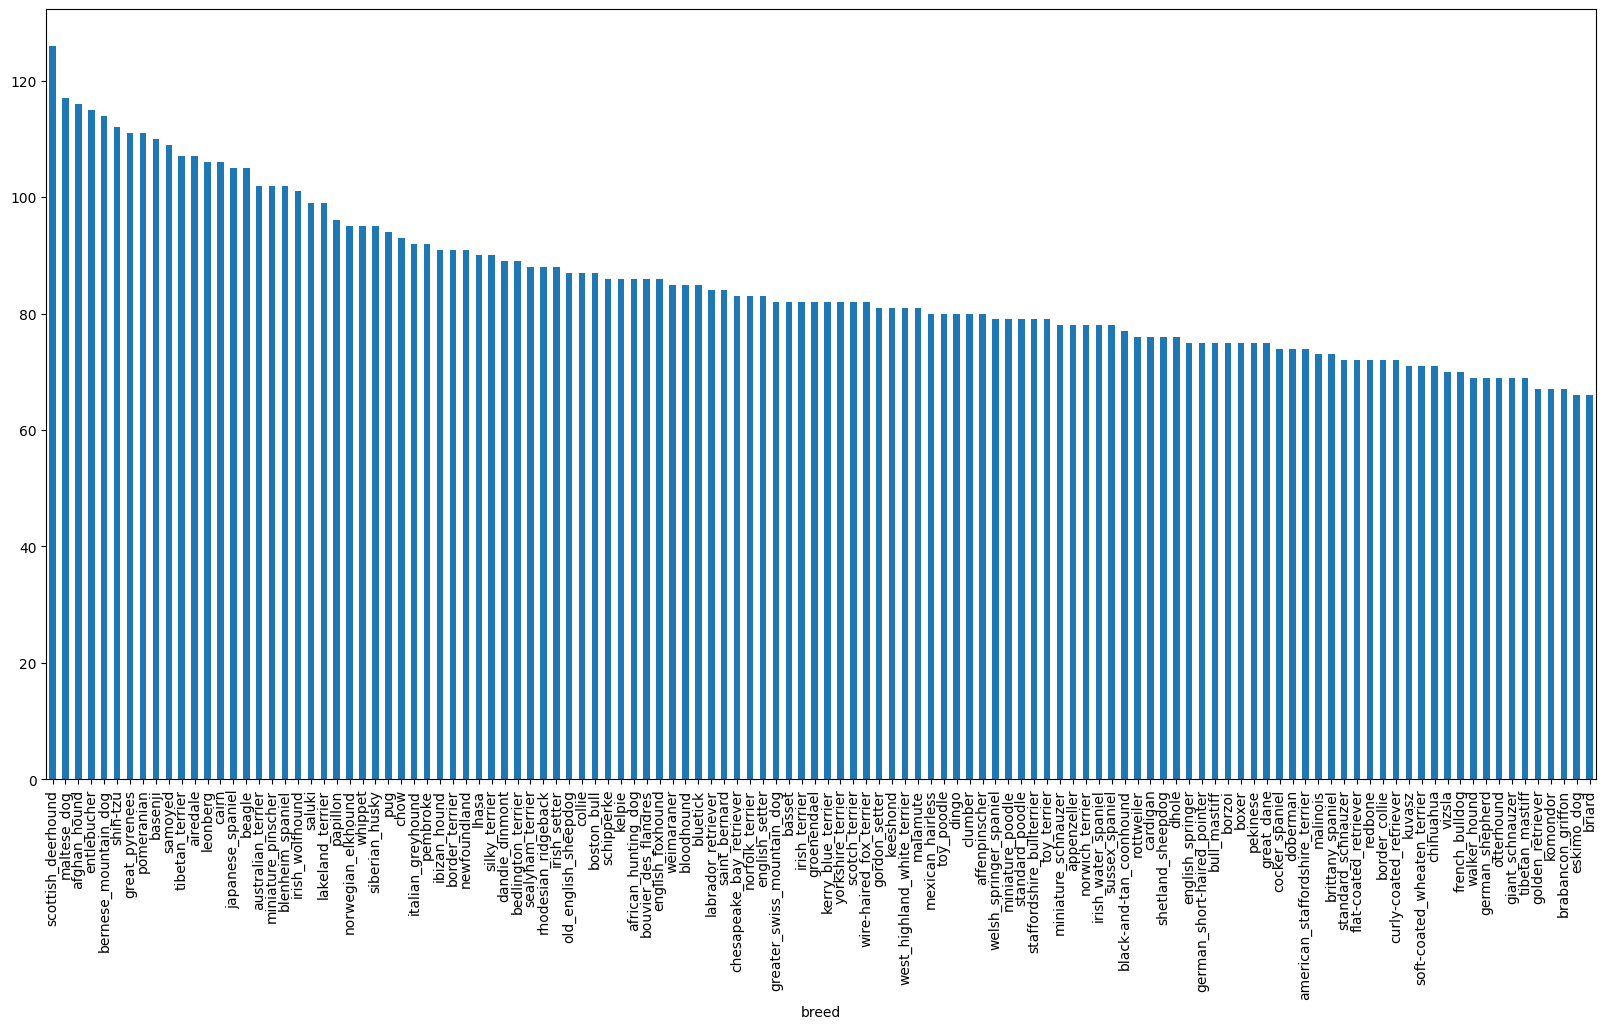

In [8]:
# How many images are there of each breed?
labels_csv['breed'].value_counts().plot.bar(figsize=(20, 10))

In [9]:
labels_csv['breed'].value_counts().median()

82.0

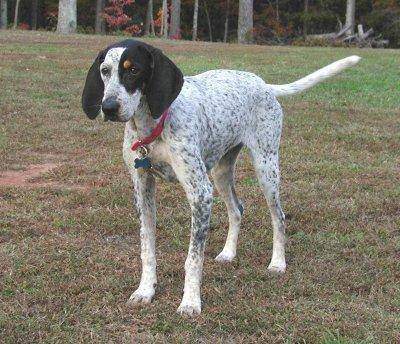

In [10]:
from IPython.display import Image
Image('drive/MyDrive/dog_vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg')

### Getting images and their labels

In [11]:
filenames = [f"drive/MyDrive/dog_vision/train/{fname}.jpg" for fname in labels_csv["id"]]
len(filenames)

10222

In [12]:
# check whether number of filenames matches number of actual image files
import os
if len(os.listdir('drive/MyDrive/dog_vision/train/')) == len(filenames):
  print('your data is match with data source ✅')
else:
  print('your data is not match with data source check out and find the problem ❌')

your data is match with data source ✅


In [13]:
os.listdir('drive/MyDrive/dog_vision')

['labels.csv', 'sample_submission.csv', 'test', 'train']

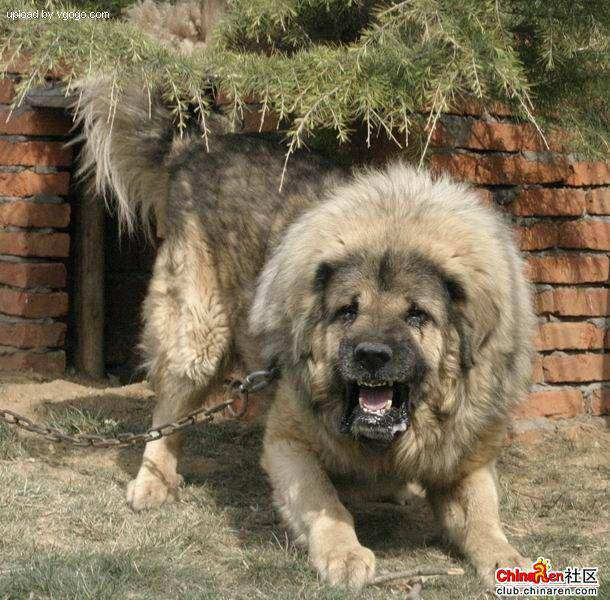

In [14]:
Image(filenames[9000])

In [15]:
labels_csv['breed'][9000]

'tibetan_mastiff'

In [16]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [17]:
import numpy as np

labels = labels_csv['breed'].to_numpy()
# labels = np.array(labels)
print(labels)
print(len(labels))

['boston_bull' 'dingo' 'pekinese' ... 'airedale' 'miniature_pinscher'
 'chesapeake_bay_retriever']
10222


In [18]:
# Ensure that the number of labels matches the number of files.

if len(labels) == len (filenames):
  print('The data is matched right now. proceed')
else:
  print('The data does not matche the labels. do not go further.')

The data is matched right now. proceed


In [19]:
# Find the unique label values.
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [20]:
# Turn a single label into an array of booleans.
print(labels[2])
labels[2] == unique_breeds

pekinese


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [21]:
# Turn every label into an array of booleans
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:3]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [22]:
print(len(boolean_labels))

10222


In [23]:
# Example: Turning boolean array into integers
print(labels[0])
print(np.where(unique_breeds == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [24]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [25]:
filenames[:3]

['drive/MyDrive/dog_vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/dog_vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/dog_vision/train/001cdf01b096e06d78e9e5112d419397.jpg']

### Creating our own validation set

In [26]:
# Setup X & Y variables
x = filenames
y = boolean_labels

In [27]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [28]:
# Split the data into train and validation of total size NUM_IMAGES
np.random.seed(42)

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

In [29]:
len(x_train), len(x_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [30]:
x_train[:3], y_train[:1]

(['drive/MyDrive/dog_vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/dog_vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/dog_vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, Fa

## Preprocessing images (turning images into tensors)

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  51],
        [ 97,  88,  47],
        [120, 111,  70]]], dtype=uint8)
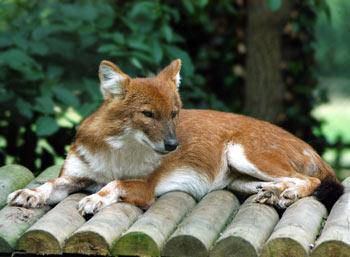

In [31]:
# Before lets convert image into Numpy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image

In [32]:
# Find the maximum and minimum value in the image
image.max(), image.min()

(np.uint8(255), np.uint8(0))

In [33]:
# Turn image into tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [34]:
# Turn image into a tensor
red_image = tf.constant(image)[:,:,1]
red_image

<tf.Tensor: shape=(257, 350), dtype=uint8, numpy=
array([[137, 124, 111, ..., 133, 134, 134],
       [119, 114, 110, ..., 131, 132, 132],
       [104, 106, 112, ..., 127, 129, 130],
       ...,
       [ 11,  14,  14, ..., 113, 118, 114],
       [  3,   7,   9, ...,  98, 104, 103],
       [ 18,  19,  20, ...,  92,  88, 111]], dtype=uint8)>

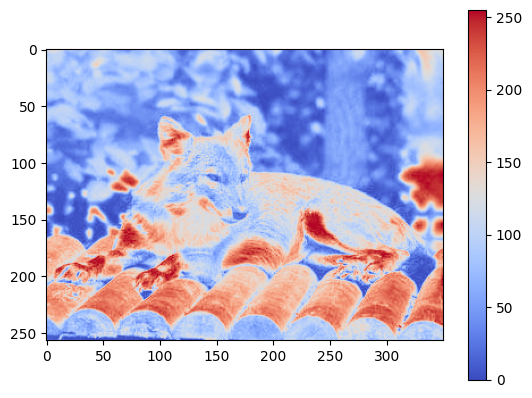

In [35]:
# Display a image with one color (green) channel.
import matplotlib.pyplot as plt
plImg = plt.imshow(red_image.numpy(), cmap="coolwarm")
plt.colorbar(plImg)
plt.show()

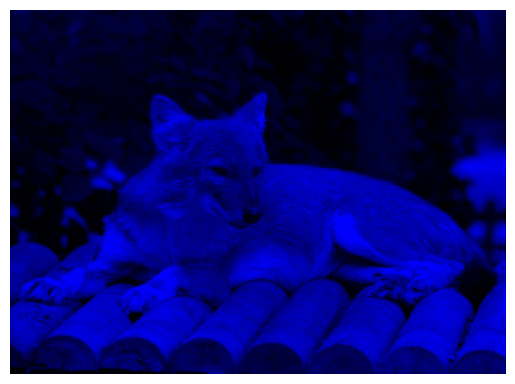

In [36]:
# Displaying image with three color channel but one of them have value (blue)
red_channel = np.zeros_like(image)
red_channel[:, :, 2] = image[:, :, 0]
plt.imshow(red_channel)
plt.axis('off')
plt.show()

In [94]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path):
  """
  Take an image file path and turn the image into a Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical tensor
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the color channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

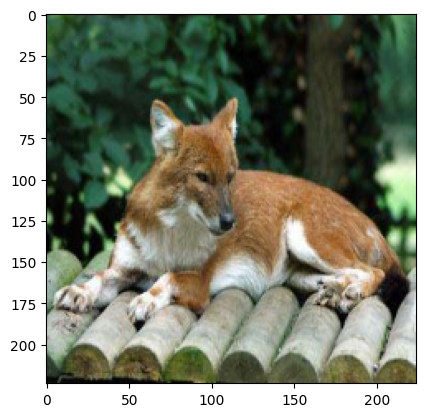

In [95]:
red_image = process_image(filenames[42])
plImg = plt.imshow(red_image.numpy())
plt.show()